In [1]:
import os
import numpy as np
import pandas as pd
import sklearn
from sklearn import linear_model
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
mldata = pd.read_csv('mldata.csv',index_col=0)
mldata

,stock_id,date,Advt_12M_Usd,Advt_3M_Usd,Advt_6M_Usd,Asset_Turnover,Bb_Yld,Bv,Capex_Ps_Cf,Capex_Sales,...,Total_Capital,Total_Debt,Total_Debt_Capital,Total_Liabilities_Total_Assets,Vol1Y_Usd,Vol3Y_Usd,R1M_Usd,R3M_Usd,R6M_Usd,R12M_Usd
0,13,2006-12-31,0.25,0.33,0.27,0.22,0.33,0.01,0.13,0.84,...,0.02,0.27,1.00,0.92,0.84,0.88,0.089,0.104,0.344,-0.041
1,13,2007-01-31,0.25,0.32,0.28,0.22,0.40,0.01,0.13,0.84,...,0.02,0.27,1.00,0.92,0.84,0.88,0.039,0.091,-0.011,-0.253
2,13,2007-02-28,0.26,0.30,0.30,0.22,0.15,0.01,0.13,0.84,...,0.02,0.27,1.00,0.92,0.87,0.88,-0.012,0.101,0.118,-0.366
3,17,2015-03-31,0.73,0.64,0.70,0.40,0.47,0.01,0.70,0.74,...,0.40,0.75,1.00,1.00,1.00,0.99,0.174,-0.144,-0.518,-0.376
4,17,2015-04-30,0.72,0.62,0.66,0.40,0.46,0.01,0.70,0.74,...,0.40,0.75,1.00,1.00,1.00,0.99,-0.106,-0.576,-0.535,-0.113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283375,1205,2004-05-31,0.97,0.97,0.98,0.19,0.74,1.00,0.54,0.90,...,0.99,0.99,0.57,0.59,0.34,0.63,-0.029,-0.027,0.038,0.112
283376,1205,2004-07-31,0.97,0.96,0.98,0.19,0.75,1.00,0.53,0.90,...,0.99,0.99,0.58,0.60,0.29,0.64,0.028,0.077,0.175,0.122
283377,1205,2004-08-31,0.97,0.96,0.97,0.19,0.75,1.00,0.53,0.90,...,0.99,0.99,0.58,0.60,0.27,0.64,0.011,0.076,0.152,0.091
283378,1205,2004-09-30,0.97,0.96,0.97,0.18,0.93,1.00,0.52,0.90,...,0.99,0.99,0.57,0.60,0.26,0.66,0.045,0.178,0.196,0.040


In [4]:
mldata.columns.size

99

In [5]:
features = mldata[mldata.columns[2:-4]]
targets = mldata[mldata.columns[-4:]]

In [7]:
X = features.values
y = targets.R1M_Usd.values

In [8]:
X

array([[0.25, 0.33, 0.27, ..., 0.92, 0.84, 0.88],
       [0.25, 0.32, 0.28, ..., 0.92, 0.84, 0.88],
       [0.26, 0.3 , 0.3 , ..., 0.92, 0.87, 0.88],
       ...,
       [0.97, 0.96, 0.97, ..., 0.6 , 0.27, 0.64],
       [0.97, 0.96, 0.97, ..., 0.6 , 0.26, 0.66],
       [0.41, 0.63, 0.52, ..., 0.18, 0.97, 0.96]])

In [9]:
y

array([ 0.089,  0.039, -0.012, ...,  0.011,  0.045, -0.356])

In [10]:
lr = linear_model.LinearRegression()

In [12]:
%%time
lr.fit(X,y)

CPU times: user 5.88 s, sys: 7.73 s, total: 13.6 s
Wall time: 1.39 s


LinearRegression()

In [13]:
s = pd.Series(lr.coef_,index=features.columns).sort_values()
_s = pd.concat([s.iloc[:10],s.iloc[-10:]])

<BarContainer object of 20 artists>

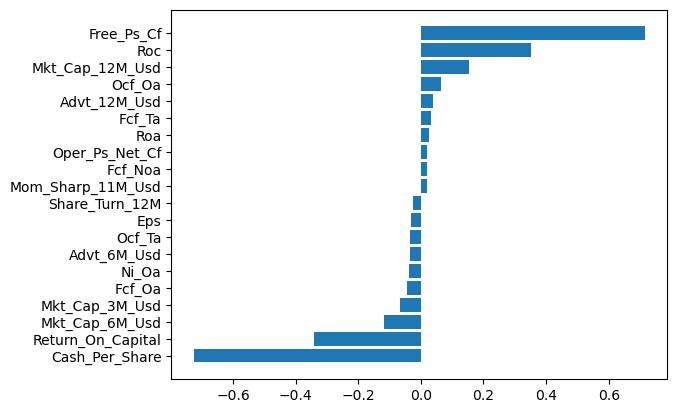

In [14]:
plt.barh(_s.index,_s.values)

In [35]:
alphas = np.logspace(-6,-2,20)

In [36]:
coef = dict()
for alpha in alphas:
    print (alpha)
    lasso_lr = linear_model.Lasso(alpha=alpha)
    lasso_lr.fit(X,y)
    coef[alpha] = lasso_lr.coef_

1e-06


/home/ezavalnyuk/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.273e+03, tolerance: 8.966e-01
  model = cd_fast.enet_coordinate_descent(


1.6237767391887209e-06


/home/ezavalnyuk/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.612e+03, tolerance: 8.966e-01
  model = cd_fast.enet_coordinate_descent(


2.6366508987303555e-06


/home/ezavalnyuk/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.017e+03, tolerance: 8.966e-01
  model = cd_fast.enet_coordinate_descent(


4.281332398719396e-06


/home/ezavalnyuk/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.658e+02, tolerance: 8.966e-01
  model = cd_fast.enet_coordinate_descent(


6.951927961775606e-06


/home/ezavalnyuk/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.821e+02, tolerance: 8.966e-01
  model = cd_fast.enet_coordinate_descent(


1.1288378916846883e-05


/home/ezavalnyuk/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.748e+01, tolerance: 8.966e-01
  model = cd_fast.enet_coordinate_descent(


1.8329807108324375e-05
2.9763514416313192e-05
4.8329302385717524e-05
7.847599703514606e-05
0.00012742749857031334
0.00020691380811147902
0.0003359818286283781
0.0005455594781168515
0.0008858667904100823
0.0014384498882876629
0.002335721469090121
0.003792690190732246
0.00615848211066026
0.01


In [39]:
df = pd.DataFrame(list(coef.values()),index=coef.keys(),columns=features.columns)

<AxesSubplot:>

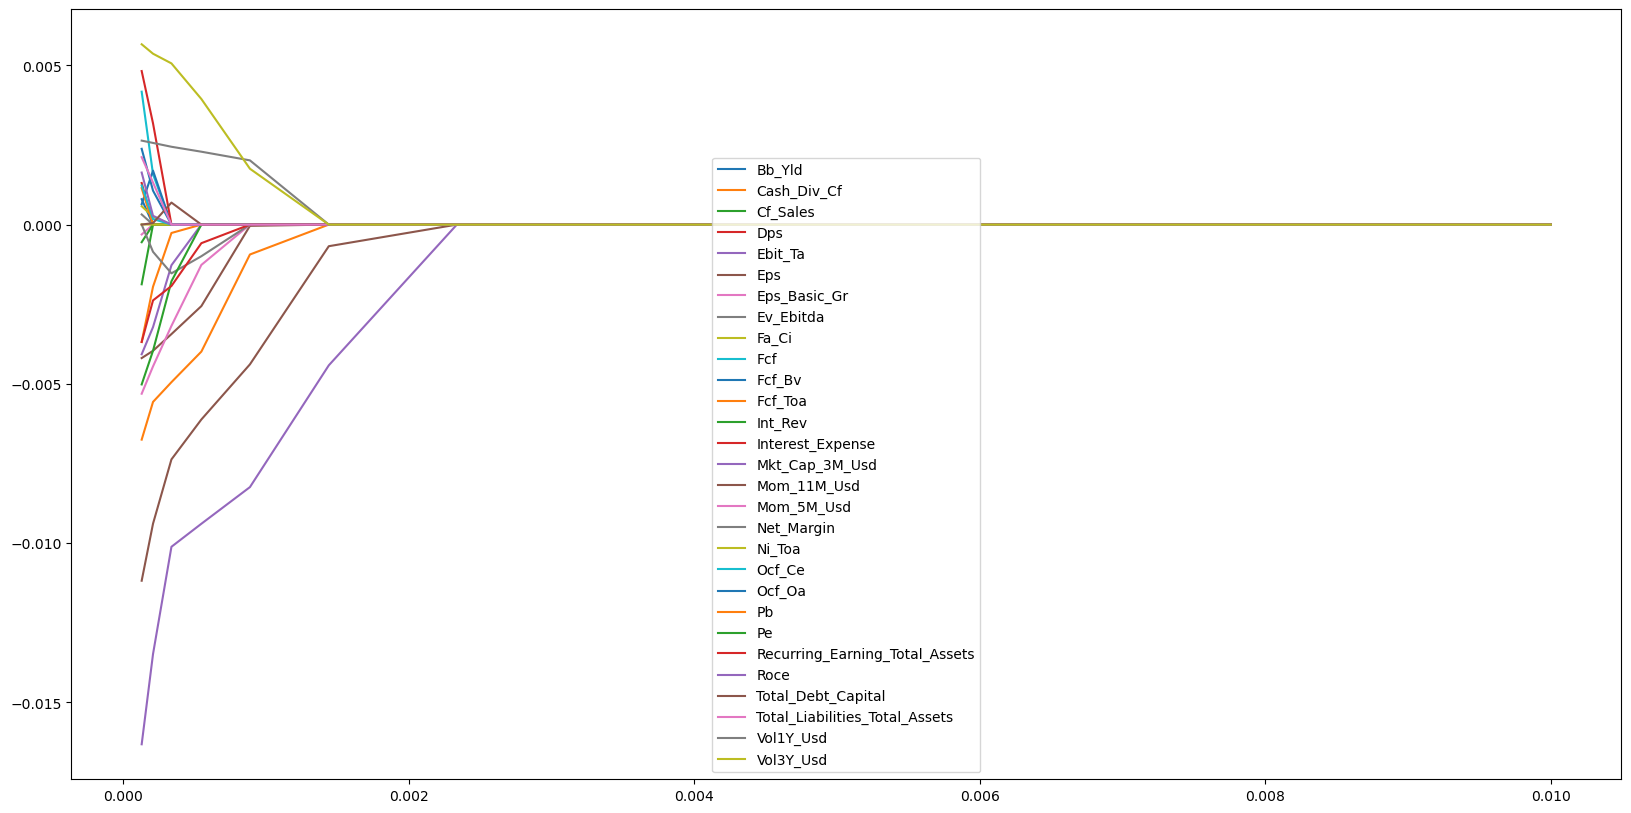

In [59]:
df.iloc[10:].loc[:,df.iloc[10:].abs().sum(axis=0)>0].plot(figsize=(20,10))

In [60]:
# Identify top-5 significant features

In [67]:
s = df.loc[(df!=0).sum(axis=1)==6].iloc[0]
s[s!=0]

Eps              -0.004388
Mkt_Cap_3M_Usd   -0.008242
Mom_11M_Usd      -0.000039
Pb               -0.000939
Vol1Y_Usd         0.002016
Vol3Y_Usd         0.001754
Name: 0.0008858667904100823, dtype: float64

In [ ]:
# repeat the same experiment for Ridge regression:
# 1) construct appropriate parameter grid
# 2) identify top significant features
# 3) compare features extracted from Lasso model with those from Ridge model